<a href="https://colab.research.google.com/github/piavila/I_ML/blob/main/Lab3a_Corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston['DESCR'])   # descripción del dataset
boston['data']           # matriz con los datos de entrada (atributos)
boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

### Respuestas

**1. ¿De qué se trata el conjunto de datos?**

Los datos a analizar fueron recolectados por Harrison y Rubinfeld en 1978 con el propósito de descubrir si el aire limpio influía o no en el valor de las casas en Boston. Sus resultados están documentados en un artículo titulado Los precios hedónicos y la demanda de aire limpio, publicado en J. Environ. Economía y Gestión 5, 81-102.

**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**
**3. ¿Qué información (atributos) hay disponibles para hacer la predicción?**

Este informe busca examinar la influencia de varios atributos del barrio en los precios de la vivienda (variable objeto), en un intento de descubrir las variables explicativas más adecuadas. Los atributos específicos del vecindario que se  consideran son: la proximidad al Río Charles, la distancia a los principales centros de empleo, la proporción de alumnos por maestro en las escuelas y los niveles de delincuencia. Mientras que el estudio original se centró en la contaminación del aire utilizando las concentraciones de óxido de nitrógeno como variable explicativa, este informe examina si existen o no otras variables explicativas mejores para el valor medio de las casas en Boston.

**4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**

Los atributos que imaginamos serán los mas determinantes para la predicción son los siguientes:
**RM** el número medio de habitaciones por vivienda
**MEDV** el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares
**AGE** proporción de unidades ocupadas por sus propietarios construidas antes de 1940


**5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.**

Varios atributos son directamente rasistas, un claro ejemplo es el atributo B: "Black proportion of population". Los datos no se pueden usar para predicciones futuras ya que son pocos los datos relevantes para predecir el precio de una casa para el 2022.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

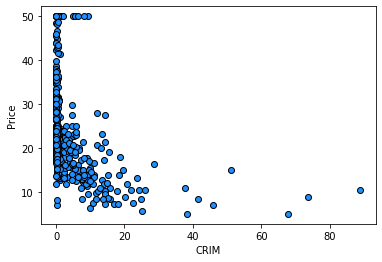

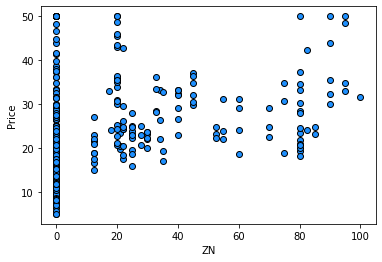

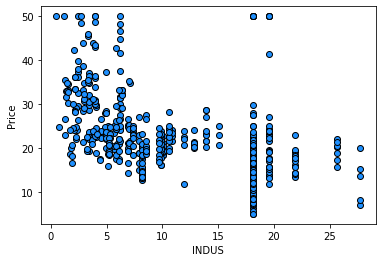

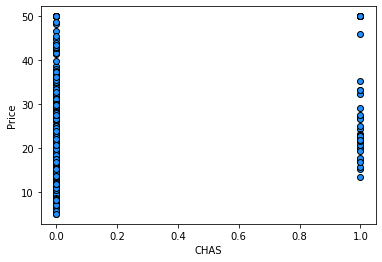

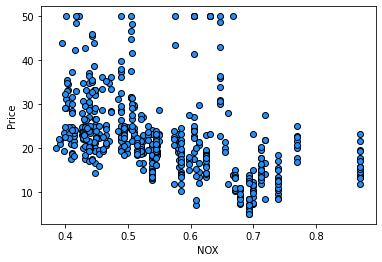

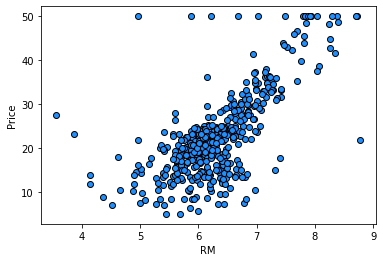

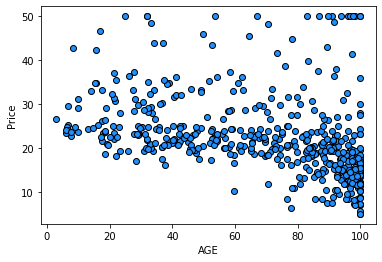

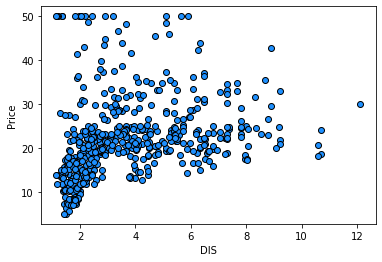

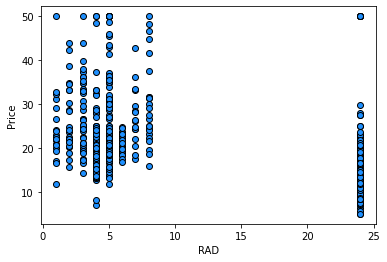

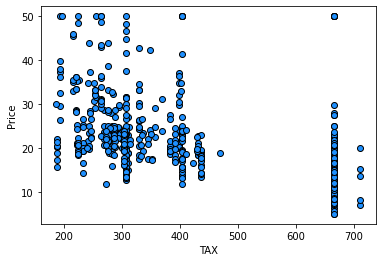

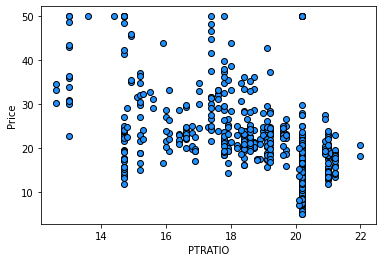

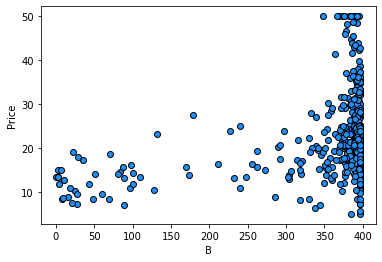

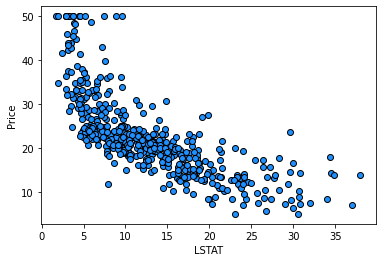

In [ ]:
#Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
figsize=(10, 60)

for index, feature_name in enumerate(boston.feature_names):
   
    plt.figure()
    plt.scatter(boston.data[:, index], boston.target, facecolor="dodgerblue", edgecolor="k")
    plt.ylabel('Price')
    plt.xlabel(feature_name)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'B'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
X_train_f=X_train_f.flatten()
y_train=y_train.flatten()
X_test_f=X_test_f.flatten()
y_test=y_test.flatten()

In [ ]:
X_train_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)

In [ ]:
X_train_bias.shape

(404, 2)

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
w = linear_least_squares(X_train_f, y_train)
w

array([0.03691049, 9.36893524])

In [ ]:
# 3. Predecir y evaluar acá.
y_train_pred = f(X_train_f, w)
y_test_pred = f(X_test_f, w)

In [ ]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 74.460249
Test error: 77.752856


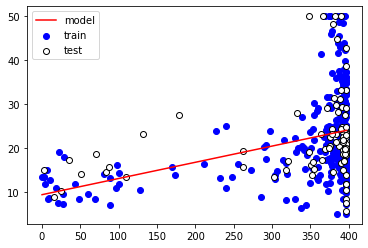

In [ ]:
# 4. Graficar acá
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200)

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, f(x, w), color="red", label="model")
plt.legend()
plt.show()

### Consideraciones para el Ejercicio 3
El modelo lineal aplicado para la variable B tiene un error cuadratico medio de 74 para los datos de entrenamiento y 77 para los datos de testeo. Por lo que se puede decir que una regresión lineal no es ideal para el conjunto de datos analizados

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
X_train_f.shape, X_test_f.shape

((404,), (102,))

In [ ]:
X_train_f = X_train_f.reshape(-1, 1)
X_test_f= X_test_f.reshape(-1, 1)
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

### A. Instanciar  entrnar B. predecir y evaluar

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

for degree in  [0,1,2,3,4,5,6,7,8]:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
   
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    print('Grado de polinomio:',degree)
    print('Media del error cuadrado para entrenamiento: %.2f' % 
          mean_squared_error(y_train, model.predict(X_train_f)))
    print('Media del error cuadrado para validación: %.2f' %
          mean_squared_error(y_test, model.predict(X_test_f)))
    print('')
    

Grado de polinomio: 0
Media del error cuadrado para entrenamiento: 85.14
Media del error cuadrado para validación: 81.58

Grado de polinomio: 1
Media del error cuadrado para entrenamiento: 74.46
Media del error cuadrado para validación: 77.75

Grado de polinomio: 2
Media del error cuadrado para entrenamiento: 73.93
Media del error cuadrado para validación: 79.58

Grado de polinomio: 3
Media del error cuadrado para entrenamiento: 73.88
Media del error cuadrado para validación: 79.71

Grado de polinomio: 4
Media del error cuadrado para entrenamiento: 73.62
Media del error cuadrado para validación: 78.30

Grado de polinomio: 5
Media del error cuadrado para entrenamiento: 72.24
Media del error cuadrado para validación: 74.15

Grado de polinomio: 6
Media del error cuadrado para entrenamiento: 72.11
Media del error cuadrado para validación: 73.67

Grado de polinomio: 7
Media del error cuadrado para entrenamiento: 76.54
Media del error cuadrado para validación: 80.24

Grado de polinomio: 8
Me

Grado de polinomio: 0


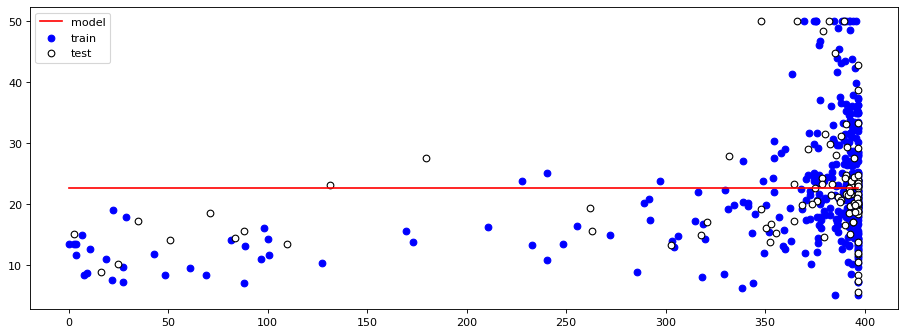

Grado de polinomio: 1


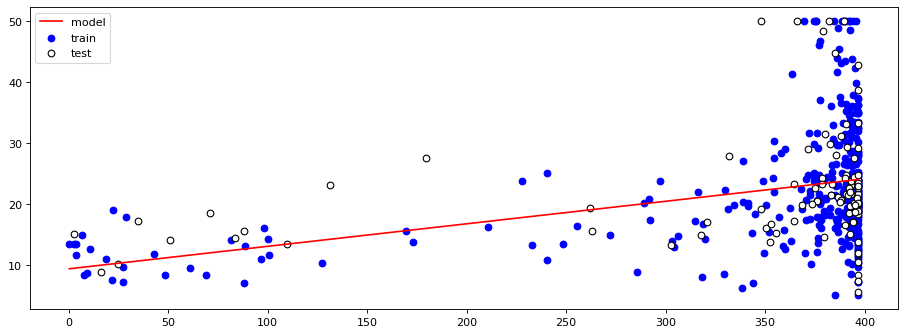

Grado de polinomio: 2


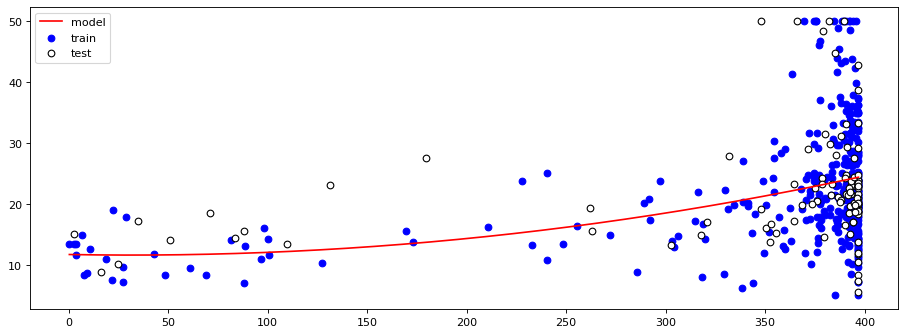

Grado de polinomio: 3


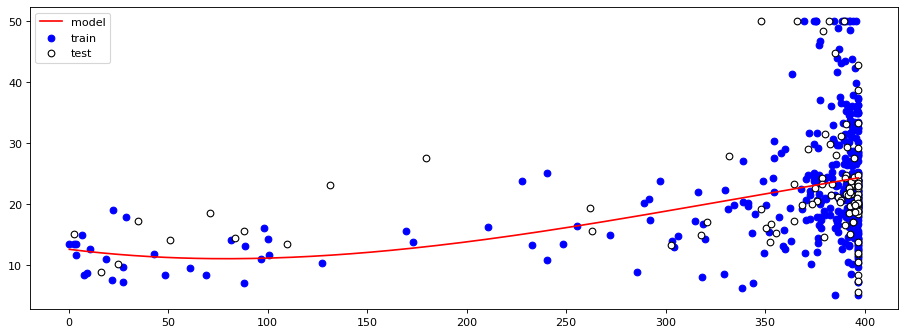

Grado de polinomio: 4


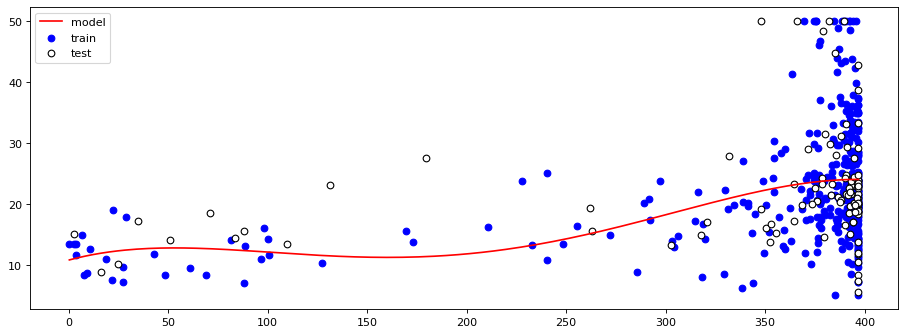

Grado de polinomio: 5


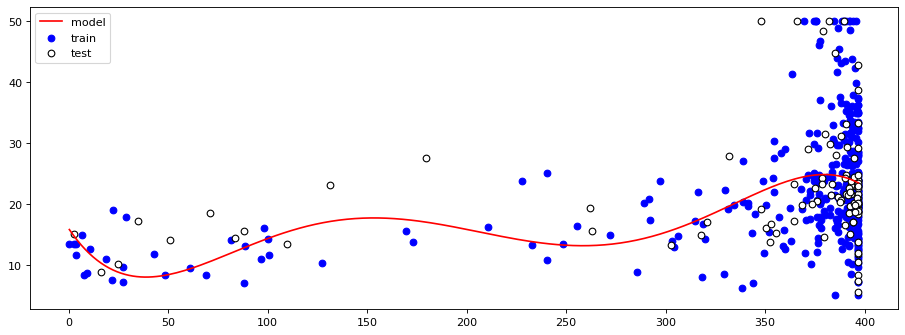

Grado de polinomio: 6


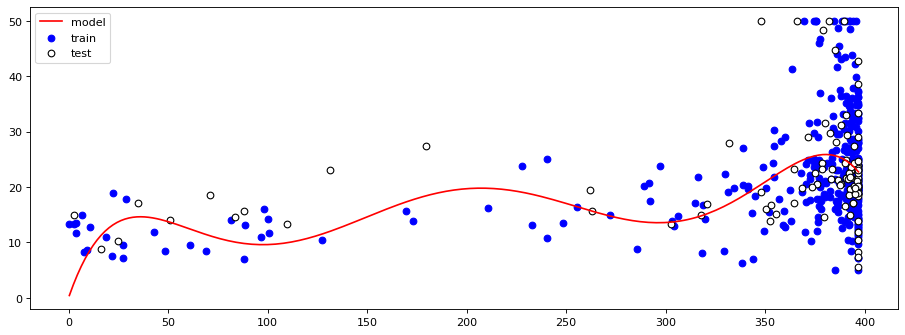

Grado de polinomio: 7


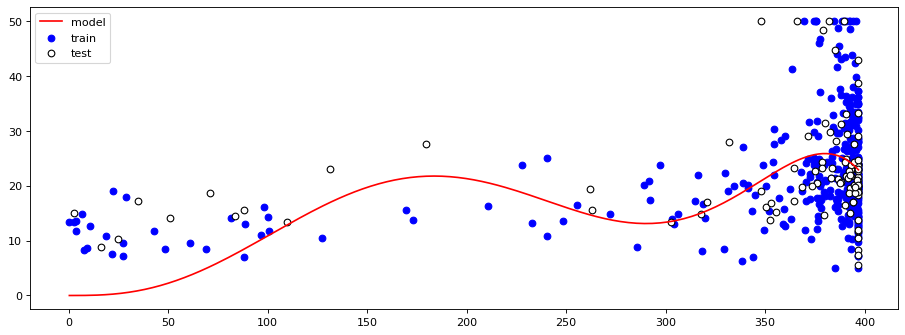

Grado de polinomio: 8


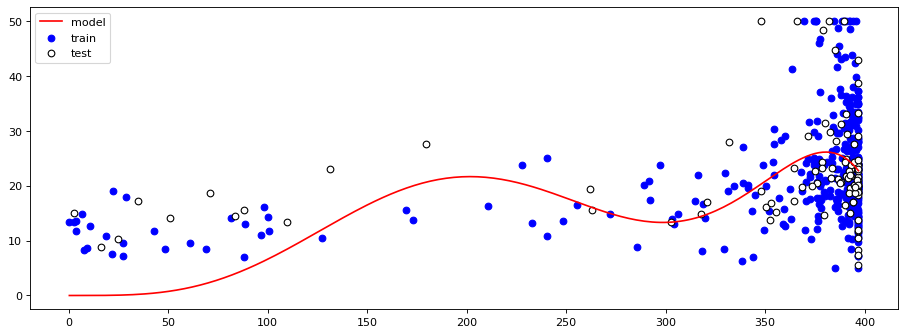

In [ ]:
# 2. Graficar curvas de error acá.
for degree in  [0,1,2,3,4,5,6,7,8]:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
   
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    print('Grado de polinomio:',degree)
    plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
    
    x_start = min(np.min(X_train_f), np.min(X_test_f))
    x_end = max(np.max(X_train_f), np.max(X_test_f))
    x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

    plt.scatter(X_train_f, y_train, color="blue", label="train")
    plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
    plt.plot(x, model.predict(x), color="red", label="model")
    plt.legend()
    plt.show()

In [ ]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7,8]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
train_errors

[85.1437202235075,
 42.82047894172751,
 37.74552897028125,
 36.395658757671086,
 34.808446256913214,
 33.131121571949116,
 33.13011641557084,
 33.06035876459896,
 33.06035722589541]

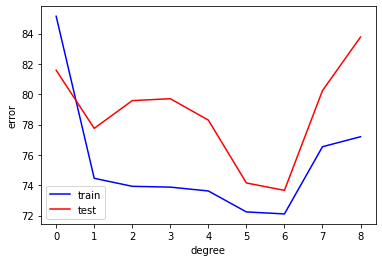

In [ ]:
#Graficaremos las curvas de error en términos del grado del polin#omio.

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [ ]:
for degree in  [1,2,3,4,5,6,7]:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
   
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    print('Grado de polinomio:',degree)
    print('Media del error cuadrado para entrenamiento: %.2f' % 
          mean_squared_error(y_train, model.predict(X_train_fs)))
    print('Media del error cuadrado para validación: %.2f' %
          mean_squared_error(y_test, model.predict(X_test_fs)))
    print('')

Grado de polinomio: 1
Media del error cuadrado para entrenamiento: 28.79
Media del error cuadrado para validación: 37.38

Grado de polinomio: 2
Media del error cuadrado para entrenamiento: 18.66
Media del error cuadrado para validación: 28.14

Grado de polinomio: 3
Media del error cuadrado para entrenamiento: 17.08
Media del error cuadrado para validación: 28.57

Grado de polinomio: 4
Media del error cuadrado para entrenamiento: 14.19
Media del error cuadrado para validación: 34.00

Grado de polinomio: 5
Media del error cuadrado para entrenamiento: 12.91
Media del error cuadrado para validación: 34.20

Grado de polinomio: 6
Media del error cuadrado para entrenamiento: 12.35
Media del error cuadrado para validación: 34.92

Grado de polinomio: 7
Media del error cuadrado para entrenamiento: 12.21
Media del error cuadrado para validación: 70.26



In [ ]:
train_errors = []
test_errors = []

for degree in  [1,2,3,4,5,6,7]:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
   
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

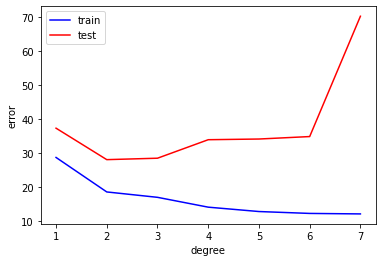

In [ ]:
#Graficaremos las curvas de error en términos del grado del polin#omio.

degrees = [ 1, 2, 3, 4, 5, 6, 7]

plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

### Consideraciones para el Ejerciocio 5
Se utilizan las variables "LSTAT" y "RM". Se aplica una regresión polinomial para ambas variables a la vez. Analizando el error medio cuadrático para los datos de entrenamiento, valización y el grafico de overfeeting concluimos que el polinomio de grado 2 es el que mejor ajusta. 





## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
